# Principal Component Analysis PCA


## Principal Component Analysis with Numpy

This section of the notebook was adapted by Benjamín Valdés for TC3006 from the a tutorial by Wendy Navarrete available at [Principal Component Analysis with NumPy](https://towardsdatascience.com/pca-with-numpy-58917c1d0391)


PCA It is a technique commonly used for linear dimensionality reduction. The idea behind PCA is to find lower dimensional representations of data that retain as much information as possible.

In [1]:
import pandas as pd               # For data loading
import matplotlib.pyplot as plt   # For plots
import numpy as np                # For arrays and math
import seaborn as sns             # For easier better looking plots

# For plots in Jupyter Notebooks
%matplotlib inline

### Load Iris Dataset

From the UCI repository directly

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",
                'petal_length','petal_width','species'] # Set columns names
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualizing Data
we can plot the data using seaborn, but we can only plot 2 out of the 4 variables. This is refered to as the curse of dimensionality, you have many more variables, but you can only visualize 2 at a time.

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

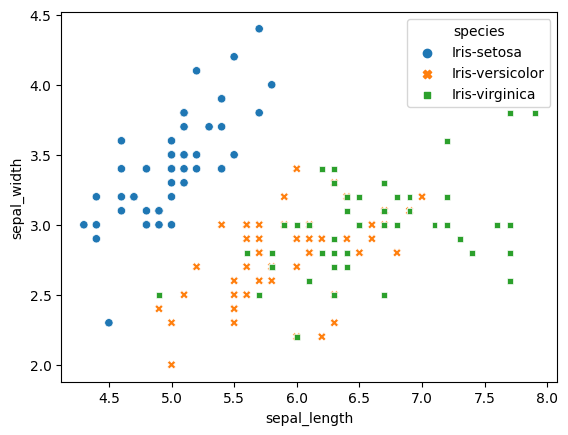

In [3]:
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)


### Standardizing the Data

Before applying PCA, the variables need them to be standardized to have a mean of 0 and a standard deviation of 1. This is important because all variables go through the origin point (where the value of all axes is 0) and share the same variance.

In [4]:
def standardize_data(arr):

    '''
    This function standardize an array, its substracts mean value,
    and then divide the standard deviation.

    param 1: array
    return: standardized array
    '''
    rows, columns = arr.shape

    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)

    for column in range(columns):

        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)

        for element in X[:,column]:

            tempArray = np.append(tempArray, ((element - mean) / std))

        standardizedArray[:,column] = tempArray

    return standardizedArray

In [5]:
# Standardizing data
X = iris.iloc[:, 0:4].values
y = iris.species.values
X = standardize_data(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Computing the Eigenvectors and Eigenvalues

We will find the covariance matrix of the dataset by multiplying the matrix of features  **X**  by its transpose. It is a measure of how much each of the dimensions varies from the mean with respect to each other. Covariance matrices, like correlation matrices, contain information about the amount of variance shared between pairs of variables.

In [6]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### Eigendecomposition of the Covariance Matrix

Eigenvectors are the principal components. The first principal component is the first column with values of 0.52, -0.26, 0.58, and 0.56. The second principal component is the second column and so on. Each Eigenvector will correspond to an Eigenvalue, each eigenvector can be scaled of its eigenvalue, whose magnitude indicates how much of the data’s variability is explained by its eigenvector.

In [7]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



### Picking Principal Components Using the Explained Variance

We now need to see how much of the variance in data is explained by each one of these components. The more variance explained by component, the more information the component retains. It is a convention to use at least  95% explained variance between the chosen components.

As shown bellow 72.77% of the variance on our data is explained by the first principal component, the second principal component explains 23.03% of data.


In [8]:
# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.77045209380134, 23.030523267680646, 3.6838319576273886, 0.5151926808906373]


### Determining how many components

If we use the only the first feature, it will explain 72.77% of the data; if we use two features we will be able to capture 95.8 of the data. If we use all features we are going to describe the entire dataset.

In [9]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


### Project Data Onto Lower-Dimensional Linear Subspace

Once we have the principal components we need to transoform all the original values in their PCA equivalents. We do this by getting the dot product of the original standardized **X** and the eigenvectors that we got from the eigendecomposition.

First we get the projection matrix which will be the first 2 eigenverctors.

In [10]:
projection_matrix = (eigen_vectors.T[:][:2]).T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

Then we need to multiply the projection matrix with all our original features, so we can map the values of the variables to values in PC1 and PC2

In [11]:
X_pca = X.dot(projection_matrix)
X_pca[:5]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ]])

To visualize our new values, we will build a dataframe and the plot it

In [12]:
column_names = ['PC1','PC2']
components = pd.DataFrame(X_pca, columns = column_names)
components.head()

,PC1,PC2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

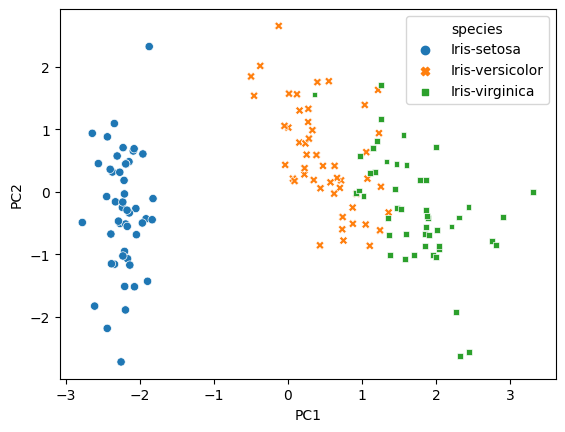

In [13]:
sns.scatterplot(x = components.PC1, y = components.PC2,
               hue = iris.species, style=iris.species)

## PCA in sklearn
This section of the notebook is based on a tutorial by Aditya Sharma available at [Python PCA](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)

### Breast Cancer Data Exploration

Use sklearn's module datasets and import the Breast Cancer dataset from it. Then reshape the data an peform the necesarry transformations to create a pandas DataFrame.

In [14]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [15]:
breast_labels = breast.target
breast_labels.shape

(569,)

Import numpy to reshape the breast_labels to concatenate it with the breast_data.

In [16]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

Create a DataFrame and check it.

In [17]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

If you note in the features array, the label field is missing. Hence, you will have to manually add it to the features array since you will be equating this array with the column names of your breast_dataset dataframe.

In [18]:
features_labels = np.append(features,'label') # Adds a name to a column list

breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function. You will use inplace=True which will modify the dataframe breast_dataset.

In [19]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### Visualizing the Breast Cancer data

Start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.

It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and select only the features from the breast_dataset you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing fit_transform on the feature data.

While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [21]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.



In [22]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.

In [23]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=5)
principalComponents_breast = pca_breast.fit_transform(x)

Next, let's create a DataFrame that will have the principal component values for all 569 samples.



In [24]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['PC1', 'PC2','PC3', 'PC4','PC5'])
principal_breast_Df.tail()


,PC1,PC2,PC3,PC4,PC5
564,6.439315,-3.576817,2.459487,1.177315,-0.074827
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723
566,1.256179,-1.902297,0.562731,-2.089227,1.809992
567,10.374794,1.672010,-1.877029,-2.356031,-0.033743
568,-5.475243,-0.670637,1.490443,-2.299155,-0.184705


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [25]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


Let's plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

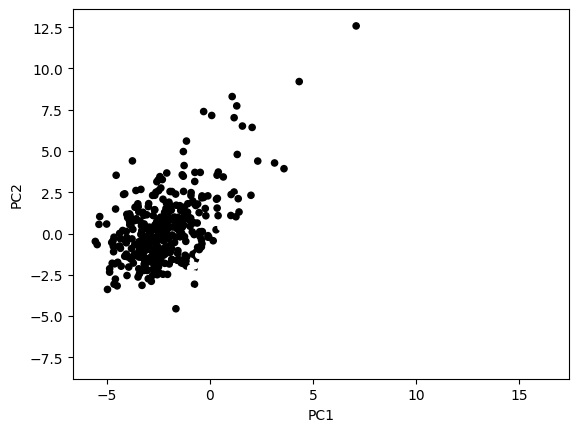

In [26]:
principal_breast_Df.plot("PC1","PC2", c = labels, kind = "scatter")

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

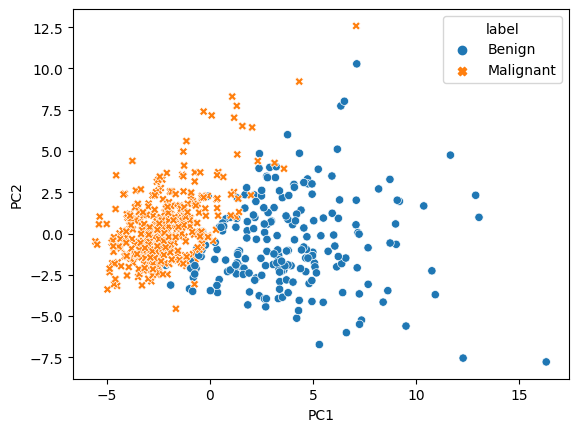

In [27]:
sns.scatterplot(x = principal_breast_Df.PC1, y= principal_breast_Df.PC2,
               hue = breast_dataset.label, style=breast_dataset.label)